# <font color="brown">Assumption Justification for Spectral Analysis</font>
## <font color="blue">Assumptions</font>

In [19]:
%%capture
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/codes/")

import pyfits
import numpy as np
import matplotlib.pyplot as plt
from util import *
from matplotlib.colors import LogNorm
import astropy.units as u
% matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [23]:
predir  = '/afs/ir.stanford.edu/class/physics100/workdir/g2/final/spectra/'
workdir = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/Project/'
datdir  = predir+'spec_0601/'

### 1. No curvature along y-direction in the spectral images

In [3]:
nud_01_data = pyfits.open(datdir+'nud01.fit')[0].data
nud_01_hdr  = pyfits.open(datdir+'nud01.fit')[0].header

nud_02_data = pyfits.open(datdir+'nud02.fit')[0].data
nud_02_hdr  = pyfits.open(datdir+'nud02.fit')[0].header

nud_03_data = pyfits.open(datdir+'nud03.fit')[0].data
nud_03_hdr  = pyfits.open(datdir+'nud03.fit')[0].header

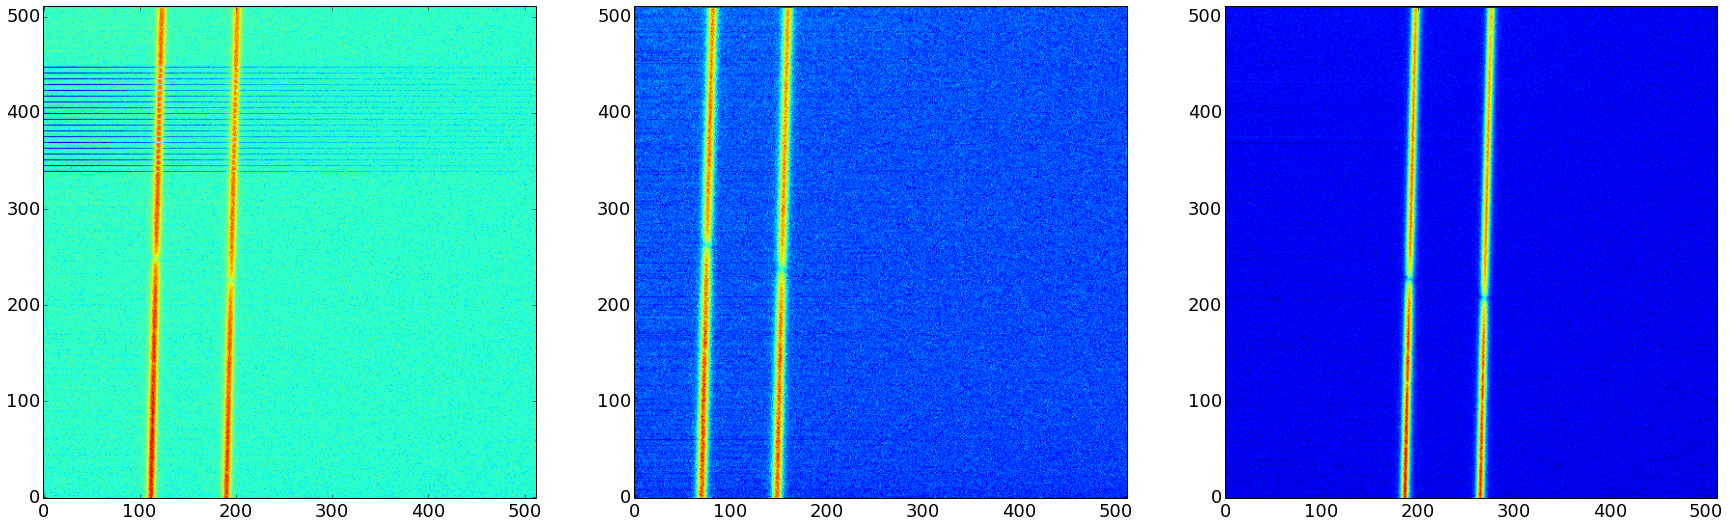

In [5]:
plt.figure(figsize=(30,10))
plt.subplot(131); plt.imshow(nud_01_data,origin='lower')
plt.subplot(132); plt.imshow(nud_02_data,origin='lower')
plt.subplot(133); plt.imshow(nud_03_data,origin='lower')

### 2. Plate scale is uniform
#### Uniform across columns 

Argument: If the plate scale across columns is fixed, the separation of the spectra of the two stars should be the same for the three images, regardless of which row it is measured.

Let's try somewhere around the 200th row, for the double star system

In [4]:
slc = 200

nud_01_spec = nud_01_data[slc]
nud_02_spec = nud_02_data[slc]
nud_03_spec = nud_03_data[slc]

And finding the peaks

In [14]:
delta = 30
nud_01_pk = peakdet(nud_01_spec,delta)
nud_02_pk = peakdet(nud_02_spec,delta)
nud_03_pk = peakdet(nud_03_spec,delta)

Peak distance for 01 is 78.0 pixels
Peak distance for 02 is 78.0 pixels
Peak distance for 03 is 78.0 pixels


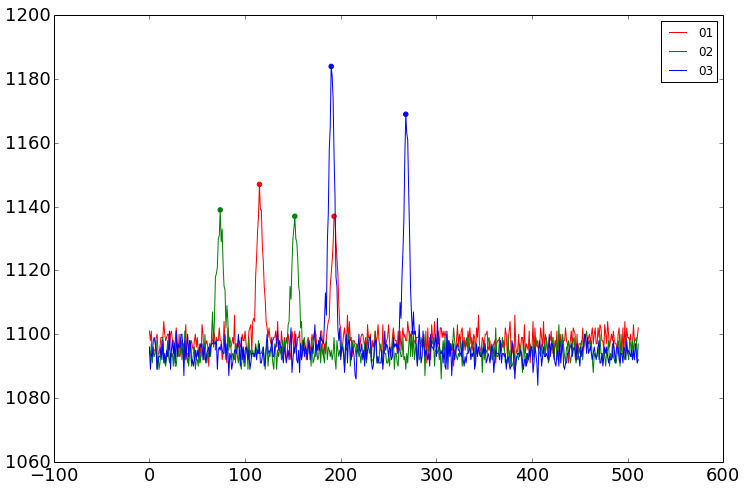

In [18]:
plt.figure(figsize=(12,8))
plt.plot(nud_01_spec,'r',label='01')
plt.plot(nud_02_spec,'g',label='02')
plt.plot(nud_03_spec,'b',label='03'); plt.legend()

plt.scatter(nud_01_pk[:,0], nud_01_pk[:,1], color='red')
plt.scatter(nud_02_pk[:,0], nud_02_pk[:,1], color='green')
plt.scatter(nud_03_pk[:,0], nud_03_pk[:,1], color='blue')

print 'Peak distance for 01 is {0} pixels'.format(nud_01_pk[1,0]-nud_01_pk[0,0])
print 'Peak distance for 02 is {0} pixels'.format(nud_02_pk[1,0]-nud_02_pk[0,0])
print 'Peak distance for 03 is {0} pixels'.format(nud_03_pk[1,0]-nud_03_pk[0,0])

Excellent. Very consistent. Now the angular separation of the two stars $\nu^1 Dra$ and $\nu^2 Dra$ is, according to their [coordinates](https://en.wikipedia.org/wiki/Nu_Draconis):

<img src='https://github.com/Mipanox/PHYS301/blob/master/Project/imgs/ang_sep.png?raw=true' width=80%> </img>

So the plate scale is

In [27]:
plate_scale = (0.0172*u.degree / (nud_01_pk[1,0]-nud_01_pk[0,0])).to(u.arcsec)
print 'Plate scale is {0:.5f}'.format(plate_scale)

np.save(workdir+'others/plate_scale.npy',plate_scale.value)

Plate scale is 0.79385 arcsec


**Note**: It should be noted that this value is larger than expected (nominal scale is 0.7 arcsec), and can be accounted for due to the "projection" effect of the slit onto a skewed line rather than perfectly aligned with the x-axis (along row). From this we can even estimate the angle of the projection to be

$$\theta\approx\cos^{-1}(\frac{0.7}{0.79385})\approx 28.14^\circ$$

which reasonably matches what we see, judged by eye

#### Uniformalong the slit in the ROI (~linear)
The ROI is chosen in the analysis [notebook](https://nbviewer.jupyter.org/github/Mipanox/PHYS301/blob/master/Project/SpecAna.ipynb)

In [33]:
roi_x = np.load(workdir+'others/roi_x.npy')
roi_y = np.load(workdir+'others/roi_y.npy')

Examine the arc image:

(170, 300)

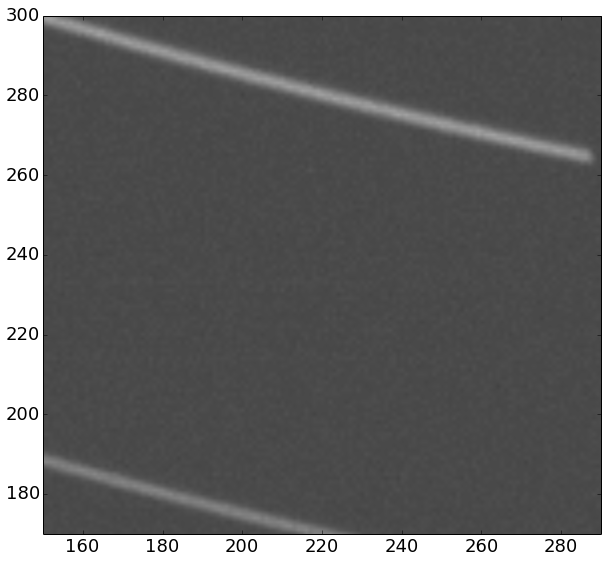

In [34]:
arc_data = pyfits.open(datdir+'Arc.fit')[0].data
arc_hdr  = pyfits.open(datdir+'Arc.fit')[0].header

plt.figure(figsize=(10,10))
plt.imshow(arc_data,origin='lower',cmap='gray'); plt.clim(1000,1400)
plt.xlim(roi_x); plt.ylim(roi_y)

There's only one emission line conspicuous in this region. Since I'm lazy, I'll wave my hands and claim that the line is rough straight, so the single plate scale scaling is justified. 
> **Warning**: This is NOT saying that the reference standord wavelengths can be taken as simple straight lines. We do that column by column so we won't be biased by any sketchy assumptions like this. But here it's only to show that the plate scale can be regarded approximately as a constant...

### 3.